In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 30)

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [453]:
target_pts = 13.5

In [454]:
linear_reg = LinearRegression()
lasso_cv = LassoCV()
lasso = Lasso()
ridge_cv = RidgeCV()
ridge_reg = Ridge()
elastic_cv = ElasticNetCV()
elastic_net = ElasticNet()
bayesian_ridge = BayesianRidge()
log_regression = LogisticRegression()
sgd_reg = SGDRegressor()
scaler = StandardScaler()

In [455]:
df = pd.read_csv('modeling_data.csv', index_col=[0,1])
df2 = df.copy()

#line_score = 12.5

In [456]:
X, y =  df2.drop(columns=['PTS_x']), df['PTS_x']
#y = y.apply(lambda x: 1 if x > target_pts else 0)

In [457]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=2)
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.fit_transform(X_val.values)

In [458]:
alphavec = 10**np.linspace(-2,2,200)

lasso_cv = LassoCV(alphas = alphavec, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [459]:
lasso_cv.alpha_

0.01

In [460]:
for col, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

FGM_x           :    4.4083961
FGA_x           :    0.0000000
FG_PCT_x        :    0.0000000
FG3M_x          :    1.5691546
FG3A_x          :    0.0000000
FG3_PCT_x       :    0.0000000
FTM_x           :    2.1510657
FTA_x           :    0.0000000
FT_PCT_x        :    0.0000000
OREB_x          :    0.0000000
DREB_x          :    0.0000000
REB_x           :    0.0000000
AST_x           :   -0.0000000
STL_x           :    0.0000000
BLK_x           :    0.0000000
TOV_x           :    0.0000000
PF_x            :    0.0000000
PLUS_MINUS_x    :    0.0000000
HOME_x          :   -0.0000000
MIN_y           :    0.0000000
FGM_y           :    0.0000000
FGA_y           :    0.0000000
FG_PCT_y        :    0.0000000
FG3M_y          :    0.0000000
FG3A_y          :    0.0000000
FG3_PCT_y       :    0.0000000
FTM_y           :    0.0000000
FTA_y           :    0.0000000
FT_PCT_y        :   -0.0000000
OREB_y          :   -0.0000000
DREB_y          :    0.0000000
REB_y           :   -0.0000000
AST_y   

In [461]:
print('R2 for LassoCV Model on train set: ' + str(lasso_cv.score(X_train_scaled, y_train)))

R2 for LassoCV Model on train set: 0.9999964095270298


In [462]:
val_set_preds = lasso_cv.predict(X_val_scaled)


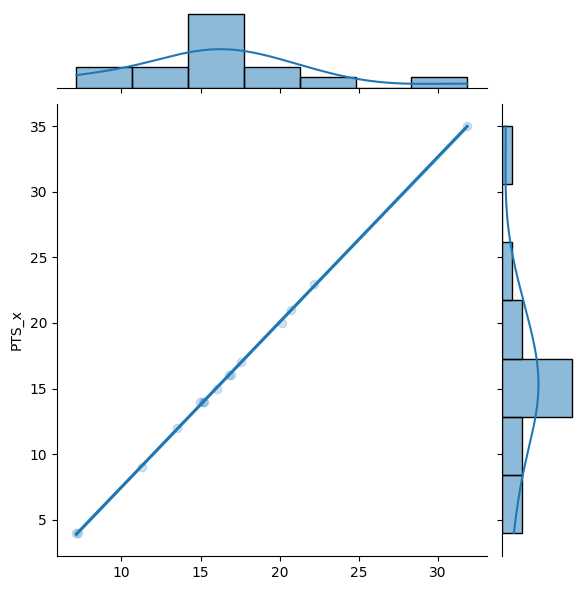

In [463]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


In [464]:
print('R2 for LassoCV Model on validation set: ' + str(lasso_cv.score(X_val_scaled, y_val)))


R2 for LassoCV Model on validation set: 0.9438603152269381


In [465]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for LassoCV model on validation set: ' + str(mae))

Mean absolute error for LassoCV model on validation set: 1.421122823918867


In [466]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for LassoCV model on validation set: ' + str(rmse))

Root mean squared error for LassoCV model on validation set: 1.7471410342024332


C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [467]:
df3 = df[['PTS_x','FGA_x', 'FG_PCT_x', 'FG3A_x', 'FG3_PCT_x', 'FG3_PCT_x', 'FTA_x', 'FT_PCT_x', 'PF_x', 'FG3M_y', 'FG3_PCT_y', 'FGM', 'rolling_avg', 'rolling_fta', 'OPPONENT_x_ATL', 'OPPONENT_x_NYK', 'OPPONENT_x_SAC']]
X, y = df3.drop(columns=['PTS_x']), df['PTS_x']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [468]:
print('R2 Score for Simple Linear Regression on Training Set using selected features: ' + str(linear_reg.score(X_train, y_train)))


R2 Score for Simple Linear Regression on Training Set using selected features: 0.9632080542321911


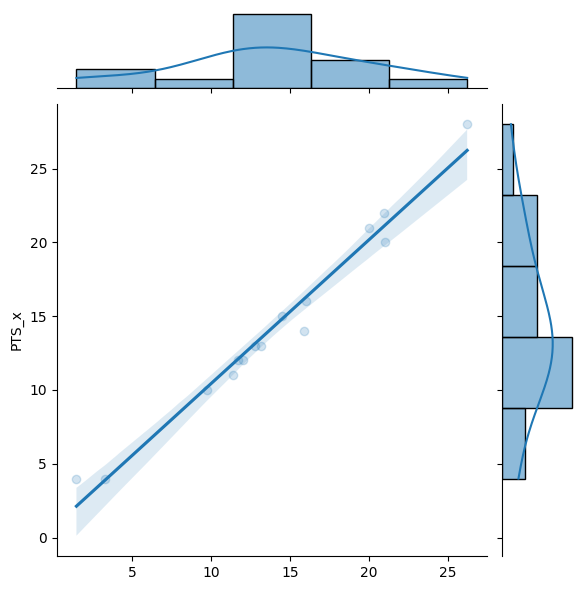

In [469]:
val_set_preds = linear_reg.predict(X_val)
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [470]:
linear_reg.fit(X_train_val, y_train_val)


LinearRegression()

In [471]:
test_set_preds = linear_reg.predict(X_test)


In [472]:
poly = PolynomialFeatures(degree=2)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [473]:
val_set_preds = lr_poly.predict(X_val_poly)
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Polynomial Regression model on validation set: ' + str(mae))
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Polynomial Regression model on validation set: ' + str(rmse))
for name, coef in zip(poly.get_feature_names_out(), lr_poly.coef_):
    print(f"{name:<6}: {coef: .3f}")

Mean absolute error for Polynomial Regression model on validation set: 1.9323469083000189
Root mean squared error for Polynomial Regression model on validation set: 2.3471285433599127
1     :  0.000
FGA_x : -0.012
FG_PCT_x:  0.012
FG3A_x: -0.050
FG3_PCT_x:  0.003
FG3_PCT_x:  0.003
FTA_x :  0.037
FT_PCT_x: -0.003
PF_x  : -0.010
FG3M_y:  0.044
FG3_PCT_y:  0.005
FGM   : -0.004
rolling_avg: -0.010
rolling_fta:  0.015
OPPONENT_x_ATL:  0.000
OPPONENT_x_NYK: -0.000
OPPONENT_x_SAC:  0.001
FGA_x^2: -0.053
FGA_x FG_PCT_x:  0.219
FGA_x FG3A_x:  0.081
FGA_x FG3_PCT_x:  0.090
FGA_x FG3_PCT_x:  0.090
FGA_x FTA_x:  0.069
FGA_x FT_PCT_x:  0.083
FGA_x PF_x: -0.008
FGA_x FG3M_y:  0.003
FGA_x FG3_PCT_y:  0.076
FGA_x FGM:  0.030
FGA_x rolling_avg: -0.024
FGA_x rolling_fta: -0.026
FGA_x OPPONENT_x_ATL:  0.005
FGA_x OPPONENT_x_NYK:  0.000
FGA_x OPPONENT_x_SAC:  0.029
FG_PCT_x^2:  0.019
FG_PCT_x FG3A_x:  0.194
FG_PCT_x FG3_PCT_x:  0.016
FG_PCT_x FG3_PCT_x:  0.016
FG_PCT_x FTA_x:  0.079
FG_PCT_x FT_PCT_x:  0.

C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [474]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)

In [475]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = 5)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

Best Score:  -1.3728133408943854
Best Param:  {'alpha': 0.0010722672220103231}


In [476]:
elastic_cv = ElasticNetCV(alphas = [0.0021544346900318843], cv=5, random_state=0);
elastic_cv.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score on training data: ', elastic_cv.score(X_train, y_train))

ElasticNet Mean R Squared Score on training data:  0.9812824476545118


In [477]:
val_set_preds = elastic_cv.predict(X_val)

In [478]:
lr_preds = linear_reg.predict(X)
df['predictions'] = lr_preds; df

C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: at least one array or dtype is required